In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Datasets/Air Quality/Air_Quality.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16218 non-null  int64  
 1   Indicator ID    16218 non-null  int64  
 2   Name            16218 non-null  object 
 3   Measure         16218 non-null  object 
 4   Measure Info    16218 non-null  object 
 5   Geo Type Name   16218 non-null  object 
 6   Geo Join ID     16218 non-null  int64  
 7   Geo Place Name  16218 non-null  object 
 8   Time Period     16218 non-null  object 
 9   Start_Date      16218 non-null  object 
 10  Data Value      16218 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


In [4]:
df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN


In [5]:
df.isna().sum()

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           16218
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Name'].unique()

array(['Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)', 'Ozone (O3)',
       'Asthma emergency department visits due to PM2.5',
       'Annual vehicle miles traveled',
       'Asthma hospitalizations due to Ozone',
       'Respiratory hospitalizations due to PM2.5 (age 20+)',
       'Boiler Emissions- Total SO2 Emissions',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Boiler Emissions- Total NOx Emissions',
       'Annual vehicle miles travelled (cars)',
       'Annual vehicle miles travelled (trucks)',
       'Cardiac and respiratory deaths due to Ozone',
       'Asthma emergency departments visits due to Ozone',
       'Outdoor Air Toxics - Formaldehyde',
       'Outdoor Air Toxics - Benzene', 'Deaths due to PM2.5'],
      dtype=object)

La materia particulada o PM (por sus siglas en inglés) 2.5, son partículas muy pequeñas en el aire que tiene un diámetro de 2.5 micrómetros

In [8]:
df['Measure'].unique()

array(['Mean', 'Estimated annual rate (under age 18)', 'million miles',
       'Estimated annual rate (age 18+)', 'Estimated annual rate',
       'Number per km2', 'Annual average concentration',
       'Estimated annual rate (age 30+)'], dtype=object)

In [9]:
df['Measure Info'].unique()

array(['ppb', 'mcg/m3', 'per 100,000 children', 'per km2',
       'per 100,000 adults', 'number', 'per 100,000', 'µg/m3'],
      dtype=object)

In [10]:
df['Geo Type Name'].unique()

array(['UHF34', 'UHF42', 'CD', 'Borough', 'Citywide'], dtype=object)

In [11]:
df['Geo Place Name'].unique()

array(['Bedford Stuyvesant - Crown Heights', 'East New York',
       'Fordham - Bronx Pk', 'Pelham - Throgs Neck', 'Chelsea-Village',
       'Borough Park', 'High Bridge - Morrisania',
       'Bensonhurst - Bay Ridge', 'Coney Island - Sheepshead Bay',
       'Rockaways', 'Mott Haven and Melrose (CD1)',
       'Financial District (CD1)', 'Greenwich Village and Soho (CD2)',
       'Woodside and Sunnyside (CD2)', 'Greenpoint',
       'Kingsbridge - Riverdale', 'Northeast Bronx', 'West Queens',
       'Washington Heights', 'Hunts Point - Mott Haven',
       'East Flatbush - Flatbush', 'Canarsie - Flatlands',
       'Southwest Queens', 'Morrisania and Crotona (CD3)',
       'Lower East Side and Chinatown (CD3)',
       'Central Harlem - Morningside Heights',
       'Downtown - Heights - Slope', 'Bronx', 'Williamsburg - Bushwick',
       'Northern SI', 'Port Richmond', 'Upper East Side (CD8)',
       'Central Harlem (CD10)', 'Washington Heights and Inwood (CD12)',
       'Bay Ridge and Dyker

In [12]:
df['Time Period'].unique()

array(['Annual Average 2011', 'Annual Average 2009',
       'Annual Average 2015', 'Annual Average 2020', 'Winter 2010-11',
       'Annual Average 2013', 'Winter 2014-15', 'Annual Average 2021',
       'Summer 2009', 'Annual Average 2017', 'Winter 2009-10',
       'Summer 2017', 'Summer 2018', 'Winter 2018-19', 'Summer 2014',
       'Winter 2016-17', 'Annual Average 2014', 'Winter 2011-12',
       'Summer 2020', '2-Year Summer Average 2009-2010',
       'Annual Average 2016', 'Annual Average 2018', 'Summer 2013',
       'Summer 2021', 'Summer 2012', 'Winter 2008-09', 'Winter 2017-18',
       'Winter 2013-14', 'Annual Average 2019', 'Summer 2016',
       'Summer 2010', 'Winter 2020-21', 'Summer 2011', 'Winter 2015-16',
       'Summer 2015', 'Summer 2019', 'Winter 2019-20', '2012-2014',
       '2015-2017', 'Annual Average 2010', 'Winter 2012-13', '2009-2011',
       '2016', '2005', '2005-2007', 'Annual Average 2012', '2015', '2013',
       '2011', '2014'], dtype=object)

In [13]:
df['Start_Date'].unique()

array(['12/01/2010', '12/01/2008', '01/01/2015', '01/01/2020',
       '12/01/2012', '12/01/2014', '01/01/2021', '06/01/2009',
       '01/01/2017', '12/01/2009', '06/01/2017', '06/01/2018',
       '12/01/2018', '06/01/2014', '12/01/2016', '12/01/2013',
       '12/01/2011', '06/01/2020', '12/31/2015', '01/01/2018',
       '06/01/2013', '06/01/2021', '06/01/2012', '12/01/2017',
       '01/01/2019', '06/01/2016', '06/01/2010', '12/01/2020',
       '06/01/2011', '12/01/2015', '06/01/2015', '06/01/2019',
       '12/01/2019', '01/02/2012', '01/01/2009', '01/01/2016',
       '01/01/2005', '01/01/2013', '01/01/2011', '01/01/2014'],
      dtype=object)

Vamos a quedarnos únicamente con los datos correspondientes a New York City

In [14]:
df = df[df['Geo Place Name'] == 'New York City']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 12077 to 15480
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       150 non-null    int64  
 1   Indicator ID    150 non-null    int64  
 2   Name            150 non-null    object 
 3   Measure         150 non-null    object 
 4   Measure Info    150 non-null    object 
 5   Geo Type Name   150 non-null    object 
 6   Geo Join ID     150 non-null    int64  
 7   Geo Place Name  150 non-null    object 
 8   Time Period     150 non-null    object 
 9   Start_Date      150 non-null    object 
 10  Data Value      150 non-null    float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 15.2+ KB


In [15]:
df.columns

Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value', 'Message'],
      dtype='object')

In [36]:
pivot_df = df.pivot_table(index=['Unique ID', 'Indicator ID', 'Measure', 'Measure Info',
                                 'Geo Type Name', 'Geo Join ID', 'Geo Place Name',
                                 'Time Period', 'Start_Date'],
                          columns='Name',
                          values='Data Value').reset_index()
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Unique ID                                               150 non-null    int64  
 1   Indicator ID                                            150 non-null    int64  
 2   Measure                                                 150 non-null    object 
 3   Measure Info                                            150 non-null    object 
 4   Geo Type Name                                           150 non-null    object 
 5   Geo Join ID                                             150 non-null    int64  
 6   Geo Place Name                                          150 non-null    object 
 7   Time Period                                             150 non-null    object 
 8   Start_Date                              

In [37]:
pd.set_option('display.max_columns', None)

In [38]:
pivot_df.head()

Name,Unique ID,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Annual vehicle miles traveled,Annual vehicle miles travelled (cars),Annual vehicle miles travelled (trucks),Asthma emergency department visits due to PM2.5,Asthma emergency departments visits due to Ozone,Asthma hospitalizations due to Ozone,Boiler Emissions- Total NOx Emissions,Boiler Emissions- Total PM2.5 Emissions,Boiler Emissions- Total SO2 Emissions,Cardiac and respiratory deaths due to Ozone,Cardiovascular hospitalizations due to PM2.5 (age 40+),Deaths due to PM2.5,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Outdoor Air Toxics - Benzene,Outdoor Air Toxics - Formaldehyde,Ozone (O3),Respiratory hospitalizations due to PM2.5 (age 20+)
0,130439,640,Number per km2,number,Citywide,1,New York City,2013,01/01/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130487,641,Number per km2,number,Citywide,1,New York City,2013,01/01/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,130535,642,Number per km2,number,Citywide,1,New York City,2013,01/01/2013,NaN,NaN,NaN,NaN,NaN,NaN,29.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,130727,646,Annual average concentration,µg/m3,Citywide,1,New York City,2005,01/01/2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9,NaN,NaN,NaN
4,130775,647,Annual average concentration,µg/m3,Citywide,1,New York City,2005,01/01/2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,NaN,NaN


In [26]:
pivot_df[pivot_df['Time Period'] == '2013']

Name,Unique ID,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Annual vehicle miles traveled,Annual vehicle miles travelled (cars),Annual vehicle miles travelled (trucks),Asthma emergency department visits due to PM2.5,Asthma emergency departments visits due to Ozone,Asthma hospitalizations due to Ozone,Boiler Emissions- Total NOx Emissions,Boiler Emissions- Total PM2.5 Emissions,Boiler Emissions- Total SO2 Emissions,Cardiac and respiratory deaths due to Ozone,Cardiovascular hospitalizations due to PM2.5 (age 40+),Deaths due to PM2.5,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Outdoor Air Toxics - Benzene,Outdoor Air Toxics - Formaldehyde,Ozone (O3),Respiratory hospitalizations due to PM2.5 (age 20+)
0,130439,640,Number per km2,number,Citywide,1,New York City,2013,01/01/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130487,641,Number per km2,number,Citywide,1,New York City,2013,01/01/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,130535,642,Number per km2,number,Citywide,1,New York City,2013,01/01/2013,NaN,NaN,NaN,NaN,NaN,NaN,29.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
pd.set_option('display.max_rows', None)

In [31]:
pivot_df[['Measure', 'Measure Info', 'Time Period', 'Asthma emergency department visits due to PM2.5']]

Name,Measure,Measure Info,Time Period,Asthma emergency department visits due to PM2.5
0,Number per km2,number,2013,NaN
1,Number per km2,number,2013,NaN
2,Number per km2,number,2013,NaN
3,Annual average concentration,µg/m3,2005,NaN
4,Annual average concentration,µg/m3,2005,NaN
5,Estimated annual rate (age 30+),"per 100,000 adults",2005-2007,NaN
6,Estimated annual rate (under age 18),"per 100,000 children",2005-2007,126.3
7,Estimated annual rate,"per 100,000 adults",2005-2007,NaN
8,Estimated annual rate,"per 100,000 adults",2005-2007,NaN
9,Estimated annual rate,"per 100,000",2005-2007,NaN


In [32]:
pivot_df['Measure'].unique()

array(['Number per km2', 'Annual average concentration',
       'Estimated annual rate (age 30+)',
       'Estimated annual rate (under age 18)', 'Estimated annual rate',
       'Estimated annual rate (age 18+)', 'Mean', 'million miles'],
      dtype=object)

In [39]:
pivot_df = pivot_df[pivot_df['Measure'].isin(['Number per km2', 'Annual average concentration', 'Estimated annual rate', 'Mean', 'million miles'])]
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 0 to 149
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Unique ID                                               122 non-null    int64  
 1   Indicator ID                                            122 non-null    int64  
 2   Measure                                                 122 non-null    object 
 3   Measure Info                                            122 non-null    object 
 4   Geo Type Name                                           122 non-null    object 
 5   Geo Join ID                                             122 non-null    int64  
 6   Geo Place Name                                          122 non-null    object 
 7   Time Period                                             122 non-null    object 
 8   Start_Date                                   

In [41]:
pivot_df.dropna(axis=1, how='all', inplace=True)
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 0 to 149
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Unique ID                                               122 non-null    int64  
 1   Indicator ID                                            122 non-null    int64  
 2   Measure                                                 122 non-null    object 
 3   Measure Info                                            122 non-null    object 
 4   Geo Type Name                                           122 non-null    object 
 5   Geo Join ID                                             122 non-null    int64  
 6   Geo Place Name                                          122 non-null    object 
 7   Time Period                                             122 non-null    object 
 8   Start_Date                                   

In [42]:
pivot_df[['Measure', 'Time Period' ,'Outdoor Air Toxics - Benzene']]

Name,Measure,Time Period,Outdoor Air Toxics - Benzene
0,Number per km2,2013,NaN
1,Number per km2,2013,NaN
2,Number per km2,2013,NaN
3,Annual average concentration,2005,2.90
4,Annual average concentration,2005,NaN
7,Estimated annual rate,2005-2007,NaN
8,Estimated annual rate,2005-2007,NaN
9,Estimated annual rate,2005-2007,NaN
17,Estimated annual rate,2009-2011,NaN
18,Estimated annual rate,2009-2011,NaN


In [43]:
df_red = pivot_df[['Time Period', 'Measure', 'Measure Info', 'Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', 'Ozone (O3)']]
df_red

Name,Time Period,Measure,Measure Info,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Ozone (O3)
0,2013,Number per km2,number,NaN,NaN,NaN
1,2013,Number per km2,number,NaN,NaN,NaN
2,2013,Number per km2,number,NaN,NaN,NaN
3,2005,Annual average concentration,µg/m3,NaN,NaN,NaN
4,2005,Annual average concentration,µg/m3,NaN,NaN,NaN
7,2005-2007,Estimated annual rate,"per 100,000 adults",NaN,NaN,NaN
8,2005-2007,Estimated annual rate,"per 100,000 adults",NaN,NaN,NaN
9,2005-2007,Estimated annual rate,"per 100,000",NaN,NaN,NaN
17,2009-2011,Estimated annual rate,"per 100,000 adults",NaN,NaN,NaN
18,2009-2011,Estimated annual rate,"per 100,000 adults",NaN,NaN,NaN


In [48]:
df_red.index

Index([  0,   1,   2,   3,   4,   7,   8,   9,  17,  18,
       ...
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
      dtype='int64', length=122)

In [52]:
null_ratio = df_red.isnull().sum(axis=1) / len(df_red.columns)

threshold = 0.5
df_cleaned = df_red[null_ratio < threshold]

df_cleaned.head()

Name,Time Period,Measure,Measure Info,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Ozone (O3)
20,2-Year Summer Average 2009-2010,Mean,ppb,NaN,NaN,28.1
29,Winter 2008-09,Mean,ppb,NaN,27.92,NaN
30,Winter 2009-10,Mean,ppb,NaN,24.77,NaN
31,Winter 2010-11,Mean,ppb,NaN,28.07,NaN
32,Winter 2011-12,Mean,ppb,NaN,22.54,NaN


In [53]:
df_cleaned = df_cleaned[df_cleaned['Time Period'].isin(['Annual Average 2009', 'Annual Average 2010', 'Annual Average 2011', 'Annual Average 2012',
                                                        'Annual Average 2013', 'Annual Average 2014', 'Annual Average 2015', 'Annual Average 2016',
                                                        'Annual Average 2017', 'Annual Average 2018', 'Annual Average 2019', 'Annual Average 2020', 
                                                        'Annual Average 2021'])]

df_cleaned

Name,Time Period,Measure,Measure Info,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Ozone (O3)
39,Annual Average 2009,Mean,ppb,NaN,22.72,NaN
40,Annual Average 2010,Mean,ppb,NaN,21.11,NaN
41,Annual Average 2011,Mean,ppb,NaN,21.58,NaN
42,Annual Average 2012,Mean,ppb,NaN,19.58,NaN
43,Annual Average 2013,Mean,ppb,NaN,18.83,NaN
54,Annual Average 2009,Mean,mcg/m3,10.43,NaN,NaN
55,Annual Average 2010,Mean,mcg/m3,9.54,NaN,NaN
56,Annual Average 2011,Mean,mcg/m3,10.10,NaN,NaN
57,Annual Average 2012,Mean,mcg/m3,8.95,NaN,NaN
58,Annual Average 2013,Mean,mcg/m3,8.63,NaN,NaN


In [56]:
df_grouped = df_cleaned.groupby('Time Period').agg({'Fine particles (PM 2.5)': 'max',
                                                    'Nitrogen dioxide (NO2)': 'max',
                                                    'Ozone (O3)': 'max' }).reset_index()
df_grouped

Name,Time Period,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Ozone (O3)
0,Annual Average 2009,10.43,22.72,NaN
1,Annual Average 2010,9.54,21.11,NaN
2,Annual Average 2011,10.10,21.58,NaN
3,Annual Average 2012,8.95,19.58,NaN
4,Annual Average 2013,8.63,18.83,NaN
5,Annual Average 2014,8.93,18.89,NaN
6,Annual Average 2015,8.56,18.40,NaN
7,Annual Average 2016,7.45,17.58,NaN
8,Annual Average 2017,7.38,17.77,NaN
9,Annual Average 2018,7.00,17.00,NaN


In [57]:
df_grouped.drop(columns='Ozone (O3)', inplace=True)

In [58]:
df_grouped['Time Period'] = df_grouped['Time Period'].str.extract(r'(\d{4})')
df_grouped

Name,Time Period,Fine particles (PM 2.5),Nitrogen dioxide (NO2)
0,2009,10.43,22.72
1,2010,9.54,21.11
2,2011,10.10,21.58
3,2012,8.95,19.58
4,2013,8.63,18.83
5,2014,8.93,18.89
6,2015,8.56,18.40
7,2016,7.45,17.58
8,2017,7.38,17.77
9,2018,7.00,17.00


In [60]:
df_grouped['Time Period'] = df_grouped['Time Period'].astype(int)

<Axes: xlabel='Time Period', ylabel='Fine particles (PM 2.5)'>

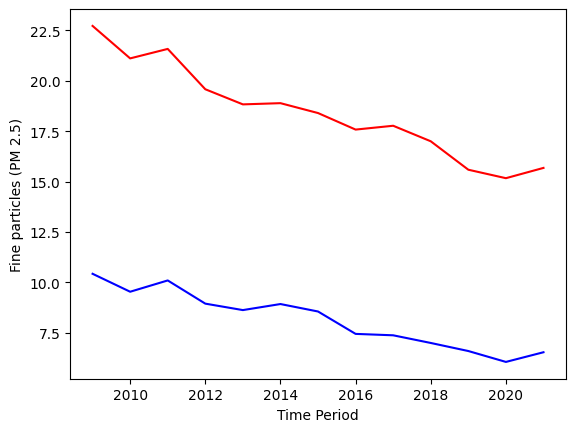

In [62]:
sns.lineplot(data= df_grouped, x='Time Period', y='Fine particles (PM 2.5)', color= 'blue')
sns.lineplot(data= df_grouped, x='Time Period', y='Nitrogen dioxide (NO2)', color= 'red')

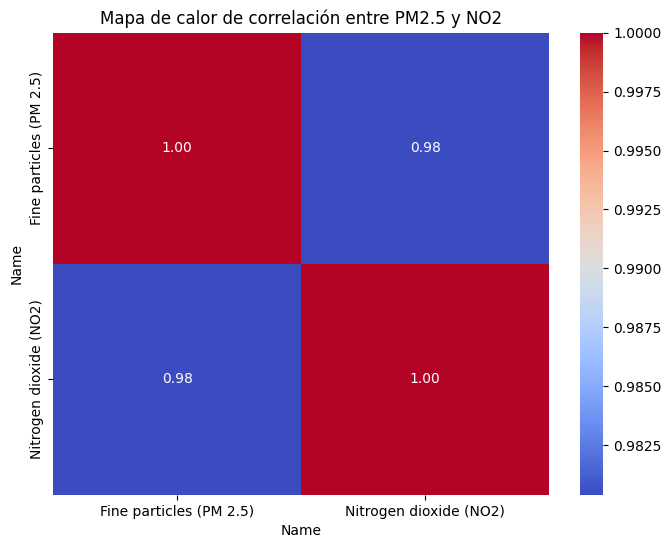

In [63]:
correlation_matrix = df_grouped[['Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre PM2.5 y NO2')
plt.show()

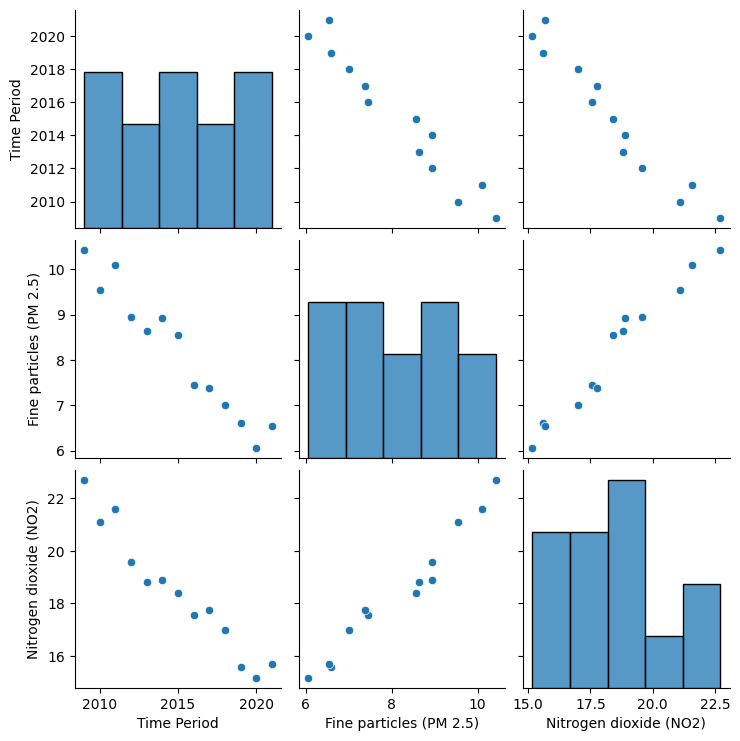

In [64]:
sns.pairplot(df_grouped)